# xG Dataset - EDA

## Importing libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Loading data

In [4]:
df = pd.read_csv("C:/Users/cerve/Desktop/DP/xG/Data/understat.csv")
df.head()

,Unnamed: 0,Unnamed: 1,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,...,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,...,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,...,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,...,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133


## Basic informations about dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    684 non-null    object 
 1   Unnamed: 1    684 non-null    int64  
 2   position      684 non-null    int64  
 3   team          684 non-null    object 
 4   matches       684 non-null    int64  
 5   wins          684 non-null    int64  
 6   draws         684 non-null    int64  
 7   loses         684 non-null    int64  
 8   scored        684 non-null    int64  
 9   missed        684 non-null    int64  
 10  pts           684 non-null    int64  
 11  xG            684 non-null    float64
 12  xG_diff       684 non-null    float64
 13  npxG          684 non-null    float64
 14  xGA           684 non-null    float64
 15  xGA_diff      684 non-null    float64
 16  npxGA         684 non-null    float64
 17  npxGD         684 non-null    float64
 18  ppda_coef     684 non-null    

- 684 entries
- 24 columns

In [6]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'position', 'team', 'matches', 'wins',
       'draws', 'loses', 'scored', 'missed', 'pts', 'xG', 'xG_diff', 'npxG',
       'xGA', 'xGA_diff', 'npxGA', 'npxGD', 'ppda_coef', 'oppda_coef', 'deep',
       'deep_allowed', 'xpts', 'xpts_diff'],
      dtype='object')

### Number of duplicates and missing values

In [7]:
df.duplicated().sum()


0

In [8]:
df.isna().sum()

Unnamed: 0      0
Unnamed: 1      0
position        0
team            0
matches         0
wins            0
draws           0
loses           0
scored          0
missed          0
pts             0
xG              0
xG_diff         0
npxG            0
xGA             0
xGA_diff        0
npxGA           0
npxGD           0
ppda_coef       0
oppda_coef      0
deep            0
deep_allowed    0
xpts            0
xpts_diff       0
dtype: int64

- 0 duplicates
- 0 NA values

Now, let's rename the first two columns according to what they really represent.

In [9]:
df = df.rename(columns={
    'Unnamed: 0': 'league',
    'Unnamed: 1': 'season_year'
})
df.head(5)

,league,season_year,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,La_liga,2014,1,Barcelona,38,30,4,4,110,21,...,28.444293,7.444293,24.727907,73.049305,5.683535,16.367593,489,114,94.0813,0.0813
1,La_liga,2014,2,Real Madrid,38,30,2,6,118,38,...,42.607198,4.607198,38.890805,47.213090,10.209085,12.929510,351,153,81.7489,-10.2511
2,La_liga,2014,3,Atletico Madrid,38,23,9,6,67,29,...,29.069107,0.069107,26.839271,25.748737,8.982028,9.237091,197,123,73.1353,-4.8647
3,La_liga,2014,4,Valencia,38,22,11,5,70,32,...,39.392572,7.392572,33.446477,16.257501,8.709827,7.870225,203,172,63.7068,-13.2932
4,La_liga,2014,5,Sevilla,38,23,7,8,71,45,...,47.862742,2.862742,41.916529,20.178070,8.276148,9.477805,305,168,67.3867,-8.6133


## One-dimensional EDA

In [10]:
print("Number of unique leagues:", df['league'].nunique())
print("Number of seasons:", df['season_year'].nunique())
print("Leagues:", df['league'].unique())
print("Season range:", df['season_year'].unique())


Number of unique leagues: 6
Number of seasons: 6
Leagues: ['La_liga' 'EPL' 'Bundesliga' 'Serie_A' 'Ligue_1' 'RFPL']
Season range: [2014 2015 2016 2017 2018 2019]


In [11]:
# Only numeric variables
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Basic descriptive statistics
desc_stats = numeric_df.describe().T

# Additional statistics
desc_stats['variance'] = numeric_df.var()
desc_stats['range'] = numeric_df.max() - numeric_df.min()
desc_stats['skewness'] = numeric_df.skew()
desc_stats['kurtosis'] = numeric_df.kurtosis()

# Print 
desc_stats.round(2)


,count,mean,std,min,25%,50%,75%,max,variance,range,skewness,kurtosis
season_year,684.0,2016.50,1.71,2014.00,2015.00,2016.50,2018.00,2019.00,2.92,5.00,0.00,-1.27
position,684.0,10.06,5.58,1.00,5.00,10.00,15.00,20.00,31.14,19.00,0.05,-1.15
matches,684.0,35.94,3.20,27.00,34.00,38.00,38.00,38.00,10.26,11.00,-1.22,-0.03
wins,684.0,13.43,5.88,2.00,9.00,12.00,16.00,32.00,34.59,30.00,0.86,0.47
draws,684.0,9.07,2.94,2.00,7.00,9.00,11.00,18.00,8.65,16.00,0.25,0.03
loses,684.0,13.43,5.51,1.00,9.00,14.00,17.00,29.00,30.36,28.00,0.04,-0.42
scored,684.0,48.19,17.61,13.00,36.00,45.00,56.00,118.00,309.95,105.00,1.16,1.63
missed,684.0,48.19,13.87,15.00,38.00,48.00,58.00,94.00,192.28,79.00,0.08,-0.35
pts,684.0,49.37,16.96,13.00,38.00,46.00,59.25,100.00,287.56,87.00,0.69,0.19
xG,684.0,47.06,14.60,15.06,37.13,44.71,53.86,113.60,213.04,98.53,1.09,1.72


## Tables

### Average xG and Goals scored by league

In [12]:
league_stats = (
    df.groupby('league')[['xG', 'scored']]
    .mean()
    .round(2)
    .sort_values(by='xG', ascending=False)
)
print(league_stats.T)


league  Serie_A    EPL  La_liga  Bundesliga  Ligue_1   RFPL
xG        51.03  50.76    50.59       48.70    45.14  33.65
scored    52.49  51.58    50.99       49.96    46.75  34.89


<Figure size 1000x600 with 0 Axes>

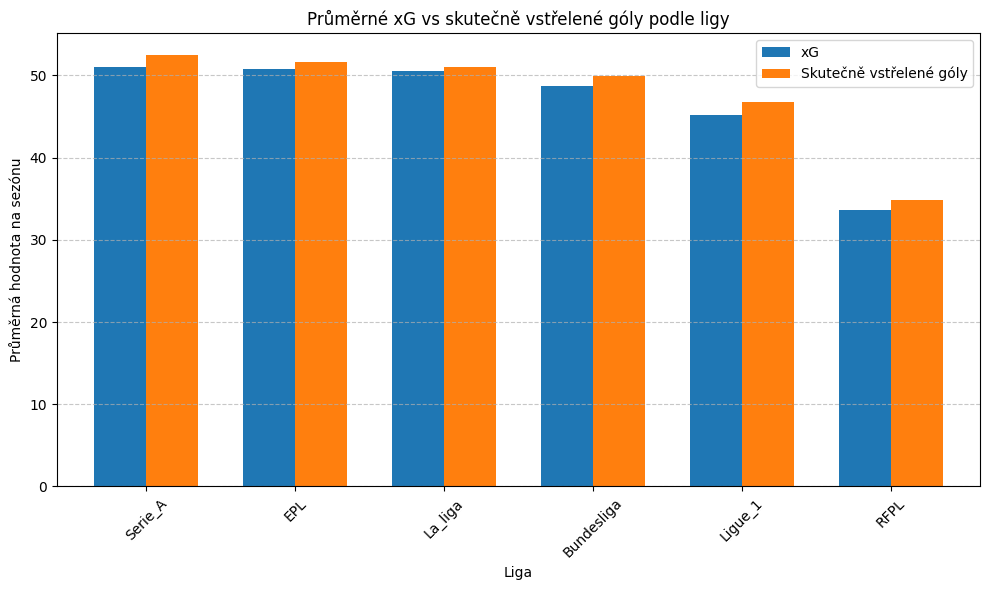

In [13]:
plt.figure(figsize=(10,6))
league_stats.plot(kind='bar', figsize=(10,6), width=0.7)
plt.title('Průměrné xG vs skutečně vstřelené góly podle ligy')
plt.ylabel('Průměrná hodnota na sezónu')
plt.xlabel('Liga')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['xG', 'Skutečně vstřelené góly'])
plt.tight_layout()
plt.show()

 - Data from 2014–2019 shows that the average xG and actual goals scored do not differ significantly.
 - The xG metric accurately reflects the actual offensive performance of teams in individual leagues.
 - Minor differences (e.g., slightly more goals than xG in the EPL or Ligue 1) may be due to finishing efficiency.
 - Overall, xG is a stable and reliable indicator of goal performance over a longer period of time.
 - In the long term, xG ≈ goals → the metric predicts actual results well

### Average xG and Goals scored based on the season

In [14]:
league_season_stats = (
    df.groupby(['league', 'season_year'])[['xG', 'scored']]
    .mean()
    .round(2)
    .reset_index()
)
league_season_stats.head(10)

,league,season_year,xG,scored
0,Bundesliga,2014,44.61,46.83
1,Bundesliga,2015,48.02,48.11
2,Bundesliga,2016,46.82,48.72
3,Bundesliga,2017,45.43,47.50
4,Bundesliga,2018,54.14,54.06
5,Bundesliga,2019,53.18,54.56
6,EPL,2014,48.33,48.75
7,EPL,2015,49.05,51.30
8,EPL,2016,49.18,53.20
9,EPL,2017,49.60,50.90


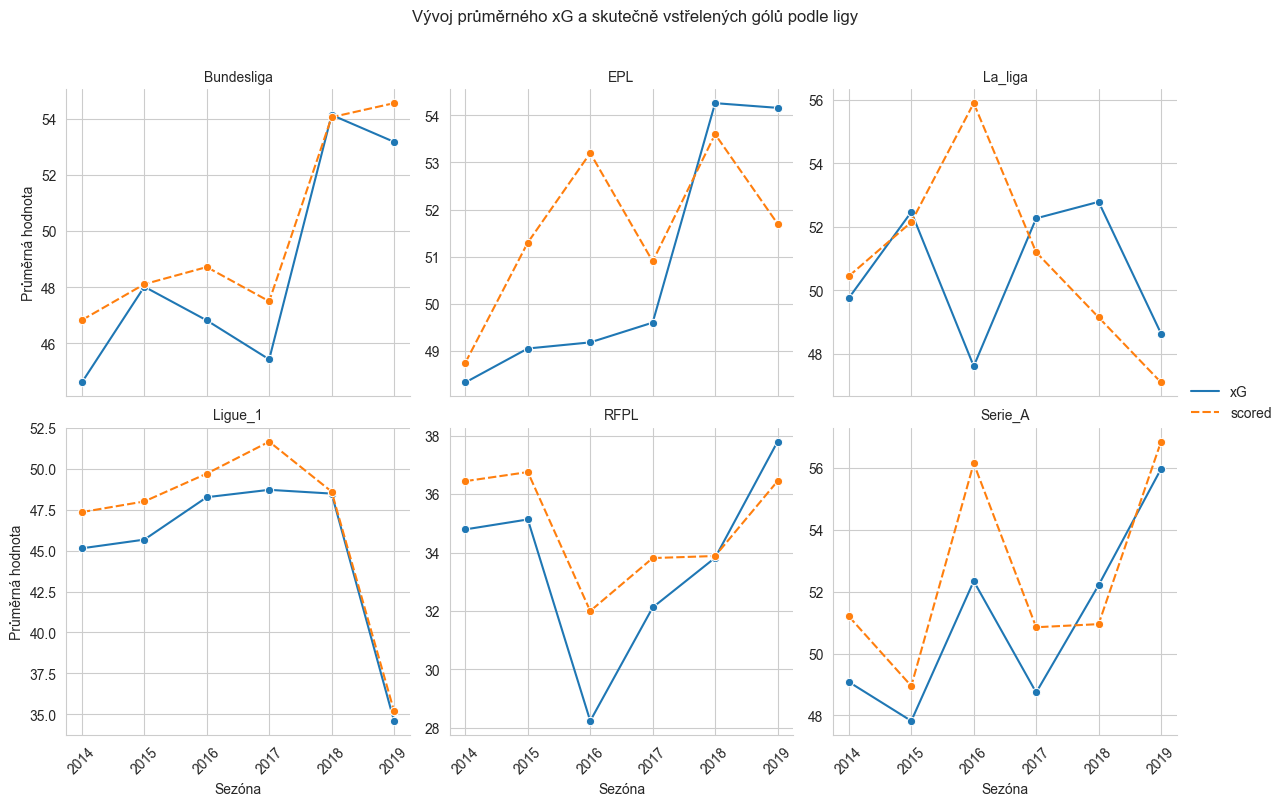

In [15]:
long = league_season_stats.melt(
    id_vars=['league', 'season_year'],
    value_vars=['xG', 'scored'],
    var_name='metric',
    value_name='value'
)
long = long.sort_values(['league', 'season_year'])
sns.set_style("whitegrid")

palette = {'xG': '#1f77b4', 'scored': '#ff7f0e'}

g = sns.relplot(
    data=long,
    x='season_year', y='value',
    col='league', col_wrap=3, height=4, facet_kws={'sharey': False},
    kind='line', marker='o',
    hue='metric', style='metric', dashes=True, 
    palette=palette
)

g.set_axis_labels("Sezóna", "Průměrná hodnota")
g.set_titles("{col_name}")
g._legend.set_title("")  
for ax in g.axes.flatten():
    ax.tick_params(axis='x', rotation=45)

plt.subplots_adjust(top=0.88)
g.fig.suptitle("Vývoj průměrného xG a skutečně vstřelených gólů podle ligy")
plt.show()

- In the **Bundesliga**, there has been a long-term upward trend in both indicators.
This suggests that the competition is becoming more offensive-minded—teams are creating more quality chances (xG growth), and this is also reflected in the actual number of goals scored. This may reflect the overall development of the style of play in German soccer, which in recent years has been characterized by high tempo and attacking productivity.

- In contrast, **Ligue 1** shows a downward trend in both xG and goals scored.
This may indicate a shift towards a more defensive style of play or greater tactical balance between teams. From the perspective of interpreting xG metrics, this could mean that teams in this league are creating fewer significant chances on average than in previous seasons.

- In **La Liga**, there is a clear anomaly around the 2016 season, when the number of goals actually scored is significantly higher than the corresponding xG. This difference can be interpreted as a period of exceptionally effective finishing – a situation where teams (especially elite ones such as Barcelona and Real Madrid) were able to convert their chances beyond expectations. From a data interpretation perspective, this shows that the xG metric is not a perfect predictor of results, but rather an indicator of the long-term trend in the quality of offensive play.

### Goals scored and xG difference based on the season

In [16]:
xg_diff_league = (
    df.groupby(['league', 'season_year'])['xG_diff']
    .mean()
    .reset_index()
)
xg_diff_league.head(10)

,league,season_year,xG_diff
0,Bundesliga,2014,-2.223334
1,Bundesliga,2015,-0.095282
2,Bundesliga,2016,-1.904428
3,Bundesliga,2017,-2.074734
4,Bundesliga,2018,0.088920
5,Bundesliga,2019,-1.372540
6,EPL,2014,-0.424778
7,EPL,2015,-2.249743
8,EPL,2016,-4.022599
9,EPL,2017,-1.301569


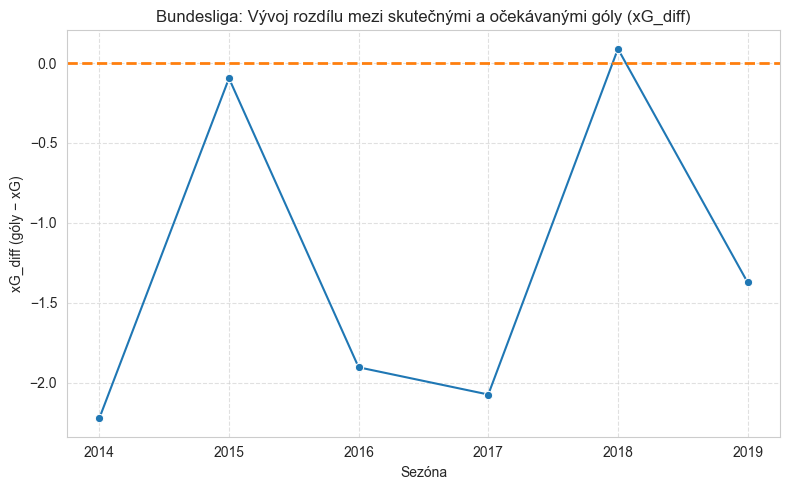

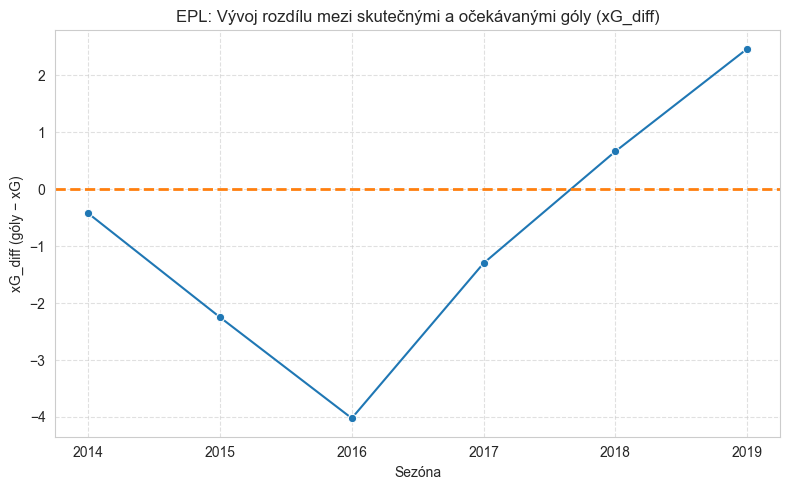

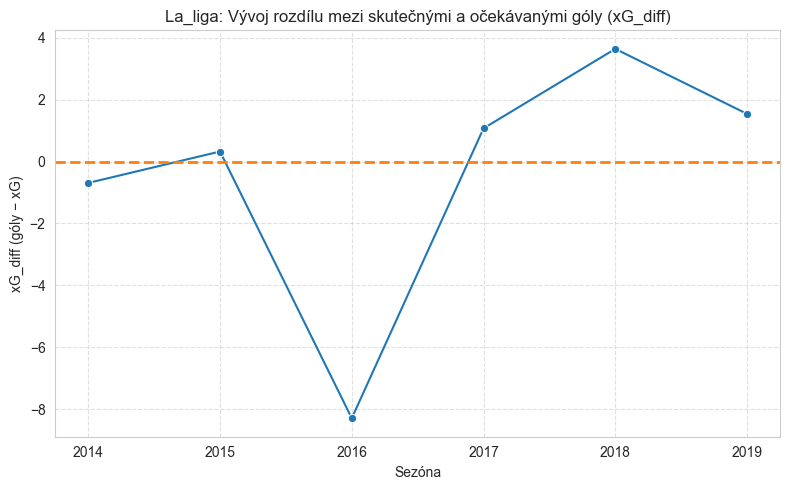

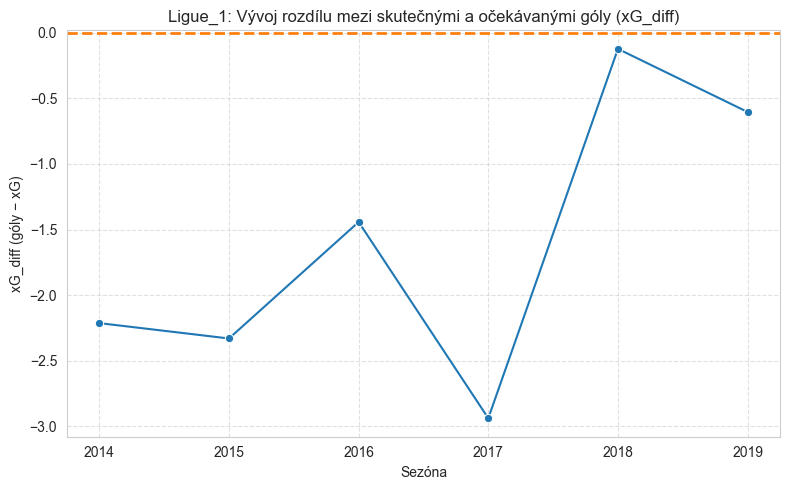

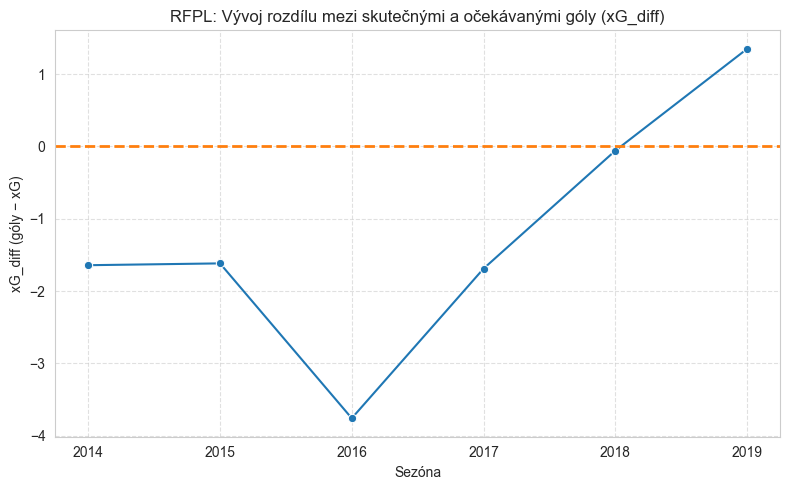

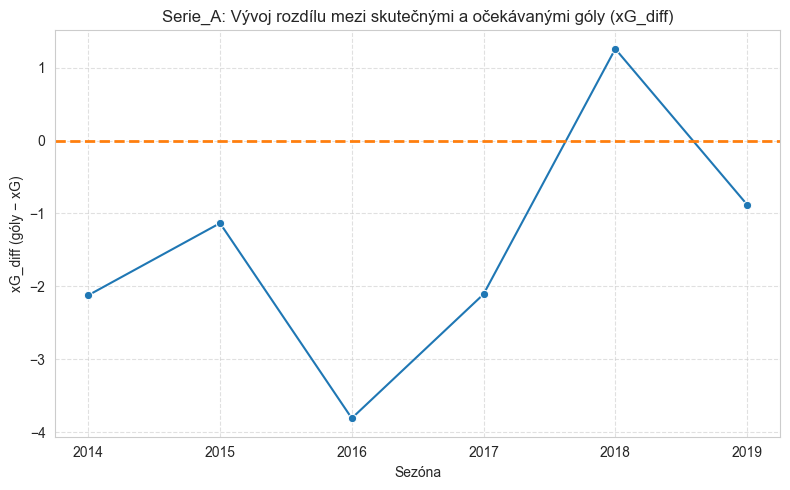

In [38]:
sns.set_style("whitegrid")

# seznam lig
leagues = sorted(xg_diff_league['league'].unique())

for league in leagues:
    data = xg_diff_league[xg_diff_league['league'] == league]

    plt.figure(figsize=(8,5))
    sns.lineplot(data=data, x='season_year', y='xG_diff', marker='o', color='#1f77b4')

    # přímka y = 0 (oranžová)
    plt.axhline(y=0, color="#ff7f0e", linewidth=2, linestyle="--")

    plt.title(f"{league}: Vývoj rozdílu mezi skutečnými a očekávanými góly (xG_diff)")
    plt.xlabel("Sezóna")
    plt.ylabel("xG_diff (góly − xG)")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

- xG_diff > 0 → teams convert chances above expectations on average (overperformance).
- xG_diff < 0 → below expectations (underperformance, weaker efficiency).
- In the long term, the metric should stabilize around zero.
- Trends indicate in which leagues finishing efficiency changes over time.

## Scatter plots

**we'll focus only on Premier League**

Numerical metrics that capture playing style and effectiveness.

### Finishing efficiency

Focuses on whether teams convert chances as expected.

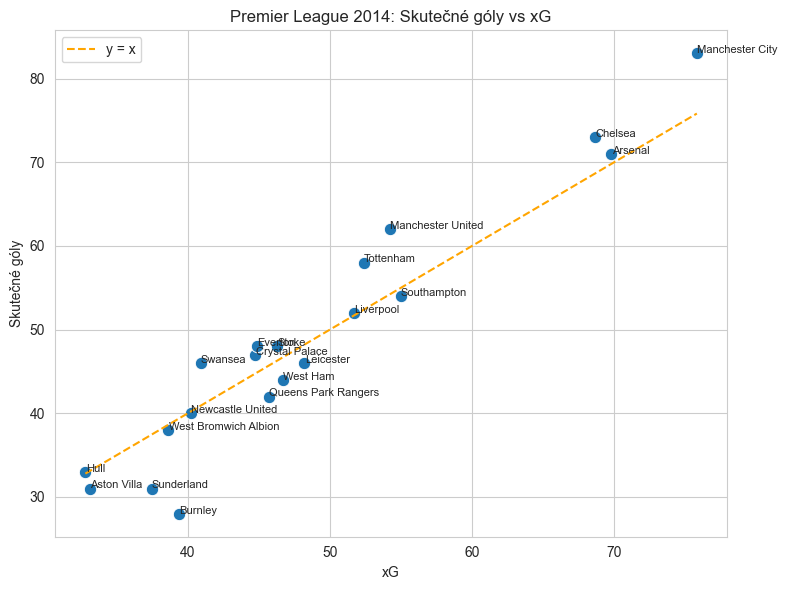

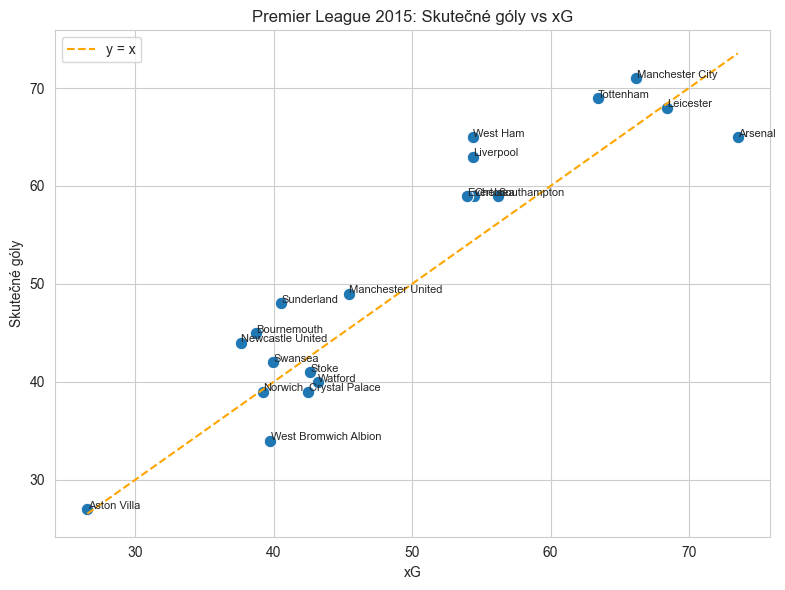

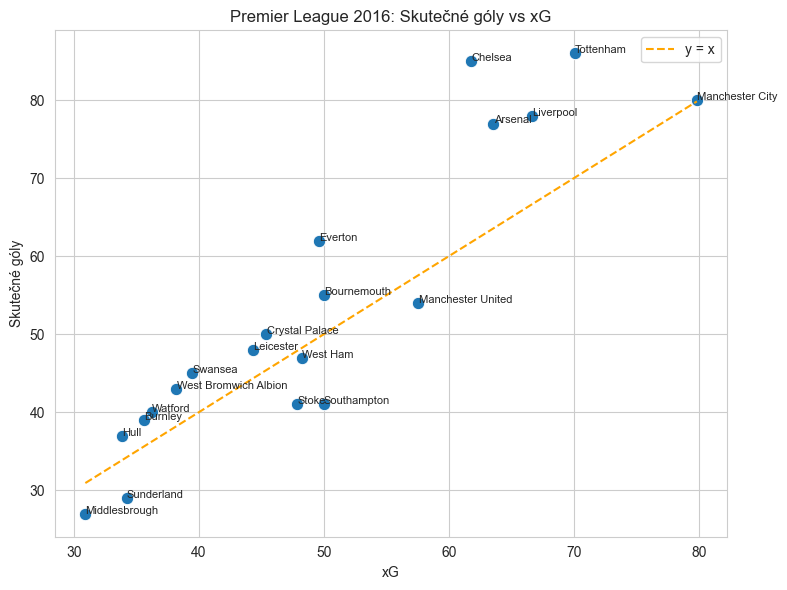

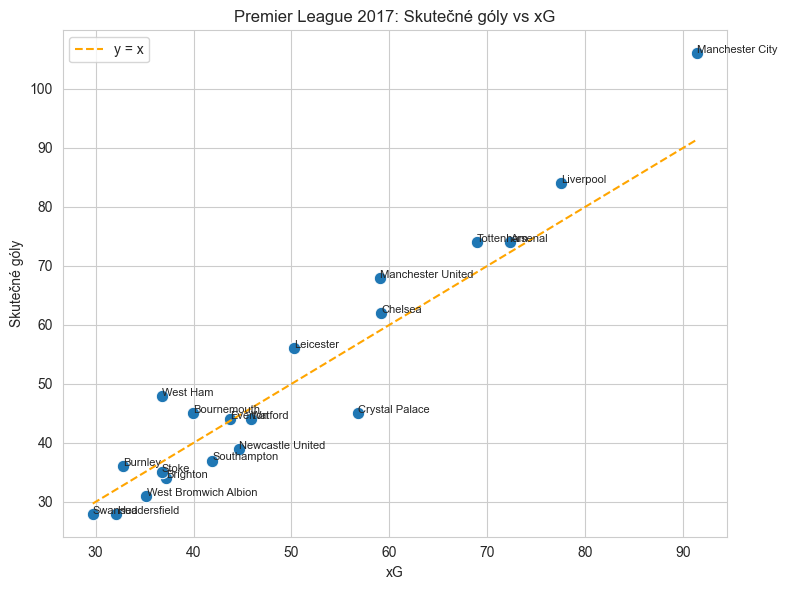

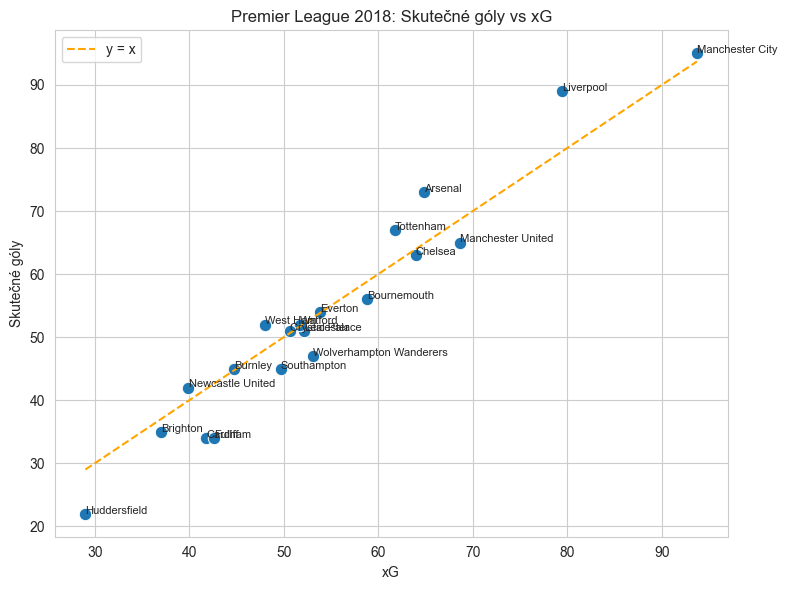

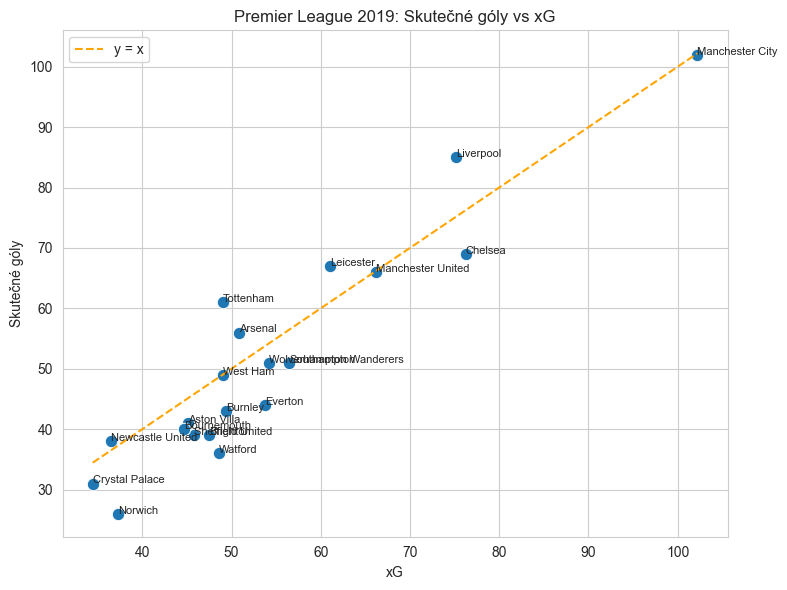

In [26]:
# Premier League
epl = df[df['league'] == 'EPL']

# List of seasons
seasons = sorted(epl['season_year'].unique())

# Plot
sns.set_style("whitegrid")

for year in seasons:
    data = epl[epl['season_year'] == year]

    plt.figure(figsize=(8,6))
    sns.scatterplot(data=data, x='xG', y='scored', s=80, color='#1f77b4')

    for i in range(data.shape[0]):
        plt.text(
            data['xG'].iloc[i] + 0.02,
            data['scored'].iloc[i] + 0.02,
            data['team'].iloc[i],
            fontsize=8
        )

    # y = x
    plt.plot(
        [data['xG'].min(), data['xG'].max()],
        [data['xG'].min(), data['xG'].max()],
        '--', color='orange', linewidth=1.5, label='y = x'
    )

    plt.title(f"Premier League {year}: Skutečné góly vs xG")
    plt.xlabel("xG")
    plt.ylabel("Skutečné góly")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
epl = df[df['league'] == 'EPL'].copy()

# overpermormance (scored > xG)
epl['overperform'] = (epl['scored'] > epl['xG']).astype(int)

# aggregation
perf_summary = (
    epl.groupby('team')['overperform']
    .agg(['sum', 'count'])
    .rename(columns={'sum': 'overperform_count', 'count': 'total_seasons'})
    .reset_index()
)

# count of underperformances = total - overperform
perf_summary['underperform_count'] = perf_summary['total_seasons'] - perf_summary['overperform_count']

# sort
perf_summary = perf_summary.sort_values(by='overperform_count', ascending=False)

perf_summary.head(15)

,team,overperform_count,total_seasons,underperform_count
25,Tottenham,6,6,0
13,Liverpool,6,6,0
0,Arsenal,5,6,1
14,Manchester City,5,6,1
8,Everton,5,6,1
6,Chelsea,4,6,2
12,Leicester,3,6,3
28,West Ham,3,6,3
24,Swansea,3,4,1
17,Newcastle United,3,5,2


- The table shows which teams consistently convert chances above expectations.
- Higher number of overperformances = above-average finishing efficiency or above-average scorers.
- Conversely, frequent underperformance can mean a weaker finish or bad luck in the final stages.

### Offensive-defensive profile of teams (Premier League, by season)

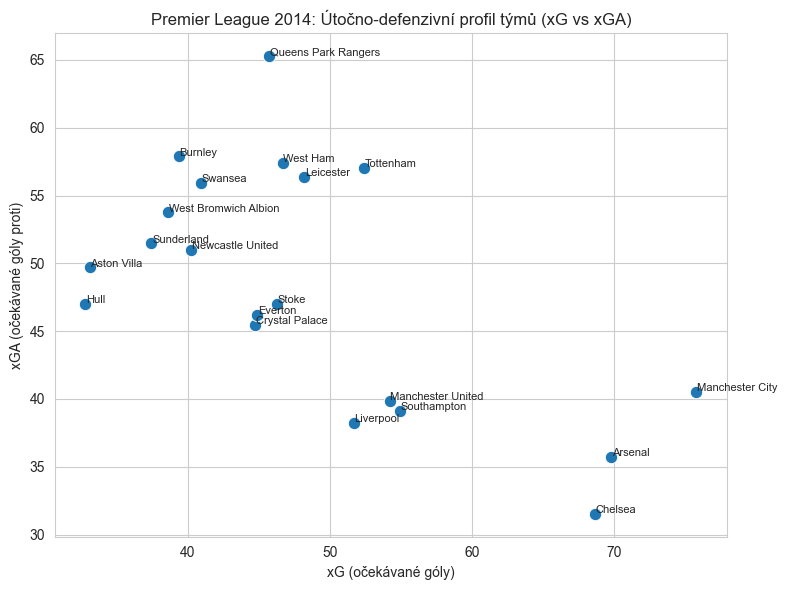

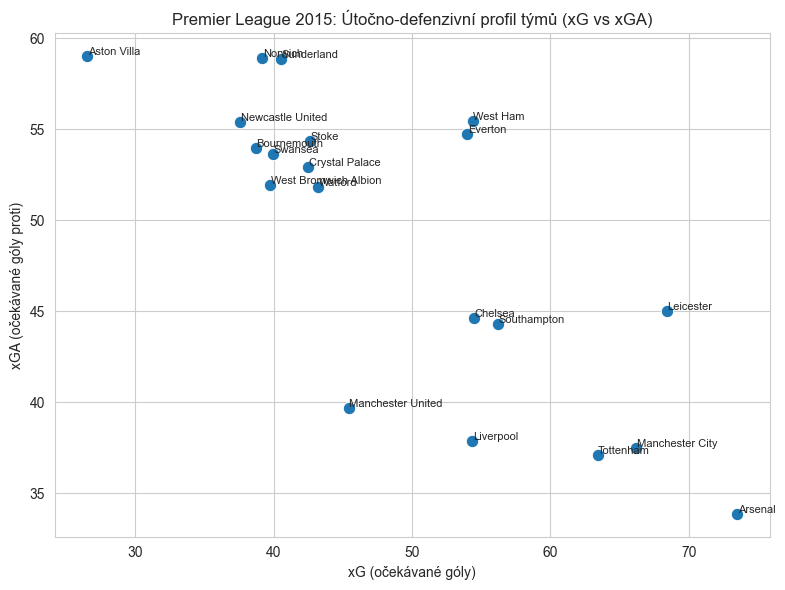

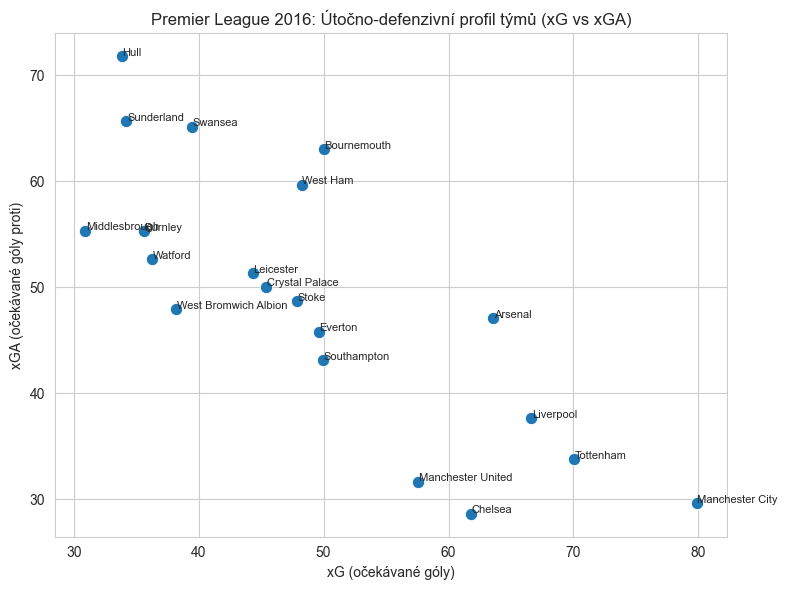

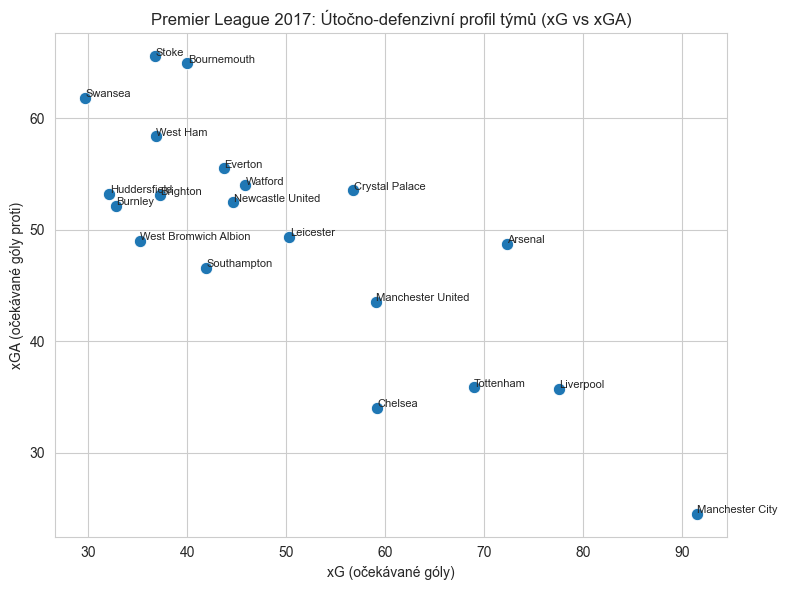

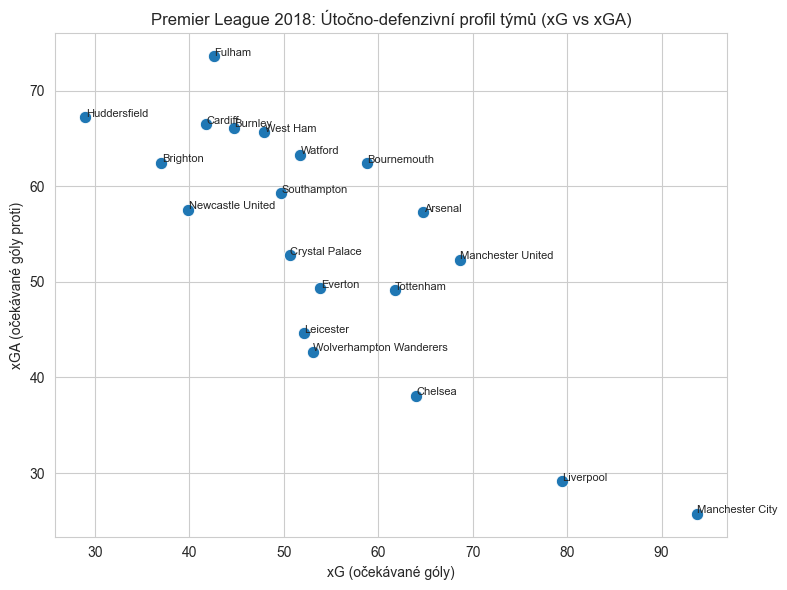

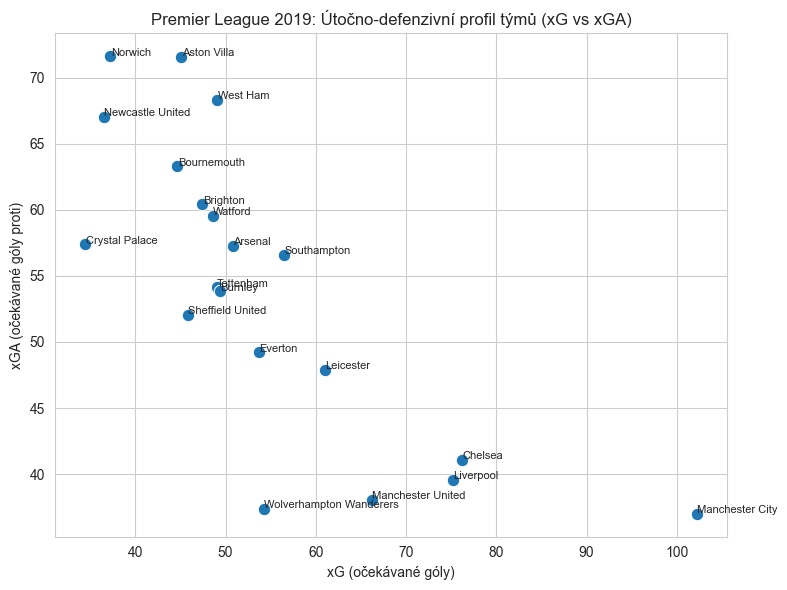

In [ ]:
sns.set_style("whitegrid")

for year in seasons:
    data = epl[epl['season_year'] == year]

    plt.figure(figsize=(8,6))
    sns.scatterplot(data=data, x='xG', y='xGA', s=80, color='#1f77b4')

    # názvy týmů
    for i in range(data.shape[0]):
        plt.text(
            data['xG'].iloc[i] + 0.05,
            data['xGA'].iloc[i] + 0.05,
            data['team'].iloc[i],
            fontsize=8
        )


    plt.title(f"Premier League {year}: Útočno-defenzivní profil týmů (xG vs xGA)")
    plt.xlabel("xG")
    plt.ylabel("xGA")
    plt.tight_layout()
    plt.show()


- xG = offensive power (the higher it is, the more chances the team creates)
- xGA = defensive weakness (the lower, the better defense)
- Lower right quadrant = dominant teams (high xG, low xGA)
- Upper left quadrant = teams that are weak both defensively and offensively
- Suitable for comparing changes in playing style across Premier League seasons

### Table – Offensive & Defensive Overperformance (Premier League)

In [33]:
# ---------- Panel A: Offensive Overperformance ----------
offensive = (
    epl.groupby('team')[['xG', 'scored']]
    .sum()
    .rename(columns={'xG': 'Expected_Goals_Created', 'scored': 'Actual_Goals_Scored'})
)

# Offensive ratio and rank
offensive['Offensive_Ratio'] = offensive['Actual_Goals_Scored'] / offensive['Expected_Goals_Created']
offensive['Offensive_Rank'] = offensive['Offensive_Ratio'].rank(ascending=False).astype(int)

offensive = offensive.sort_values('Offensive_Ratio', ascending=False).reset_index()

# ---------- Panel B: Defensive Overperformance ----------
defensive = (
    epl.groupby('team')[['xGA', 'missed']]
    .sum()
    .rename(columns={'xGA': 'Expected_Goals_Allowed', 'missed': 'Actual_Goals_Conceded'})
)

# Defensive ratio - the lower, the better
defensive['Defensive_Ratio'] = defensive['Actual_Goals_Conceded'] / defensive['Expected_Goals_Allowed']
defensive['Defensive_Rank'] = defensive['Defensive_Ratio'].rank(ascending=True).astype(int)

defensive = defensive.sort_values('Defensive_Ratio', ascending=True).reset_index()

print("=== Panel A: Offensive Overperformance ===")
display(offensive.head(15))

print("\n=== Panel B: Defensive Overperformance ===")
display(defensive.head(15))

=== Panel A: Offensive Overperformance ===


,team,Expected_Goals_Created,Actual_Goals_Scored,Offensive_Ratio,Offensive_Rank
0,Tottenham,365.550479,415,1.135274,1
1,Liverpool,404.831475,451,1.114044,2
2,West Ham,283.164328,305,1.077113,3
3,Swansea,150.072505,161,1.072815,4
4,Chelsea,384.276406,411,1.069543,5
5,Manchester City,509.224176,537,1.054545,6
6,Arsenal,394.801701,416,1.053694,7
7,Hull,66.630525,70,1.050570,8
8,Bournemouth,232.197776,241,1.037908,9
9,Everton,299.785499,311,1.037408,10



=== Panel B: Defensive Overperformance ===


,team,Expected_Goals_Allowed,Actual_Goals_Conceded,Defensive_Ratio,Defensive_Rank
0,Sheffield United,52.042457,39,0.749388,1
1,Tottenham,267.039622,236,0.883764,2
2,Manchester United,245.021590,219,0.893799,3
3,Burnley,285.275652,265,0.928926,4
4,Arsenal,279.942651,266,0.950195,5
5,West Ham,364.906575,347,0.950928,6
6,Brighton,175.961795,168,0.954753,7
7,Middlesbrough,55.301360,53,0.958385,8
8,Swansea,236.540464,227,0.959667,9
9,Newcastle United,283.484542,281,0.991236,10


### Finishing efficiency vs. results (Premier League, by season)

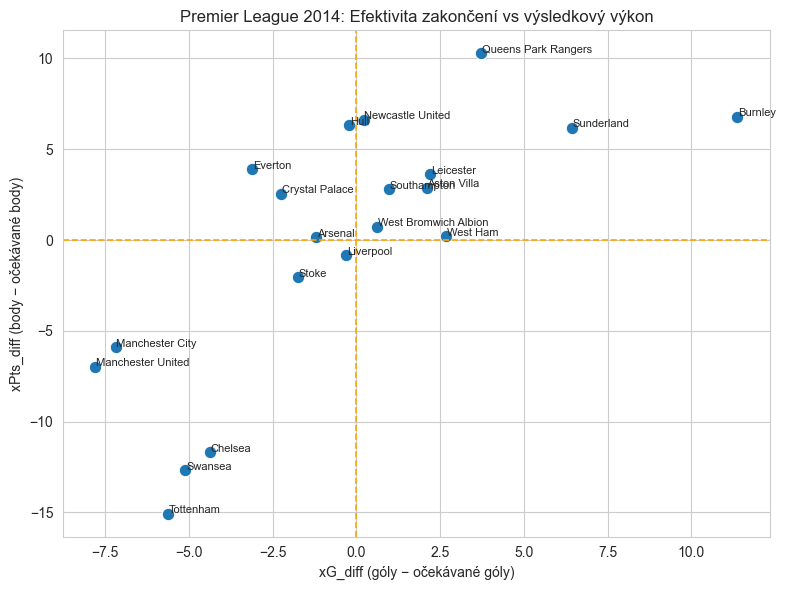

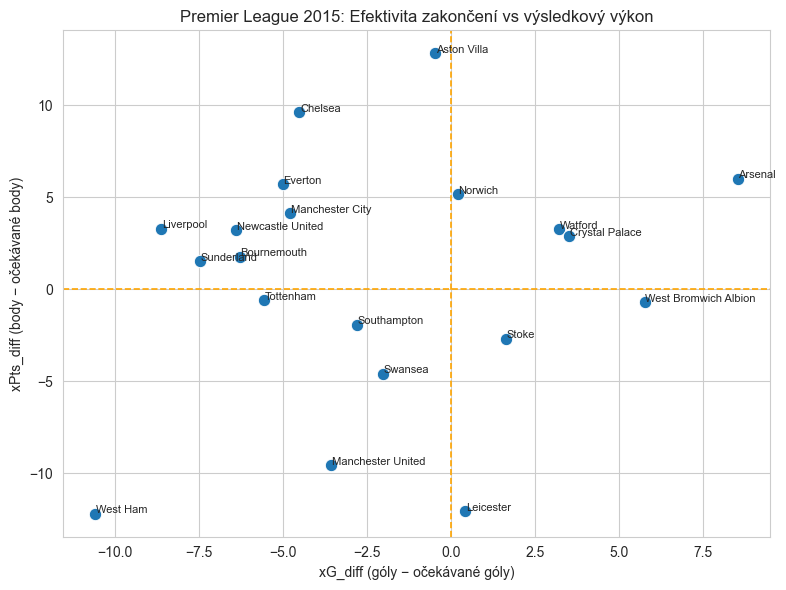

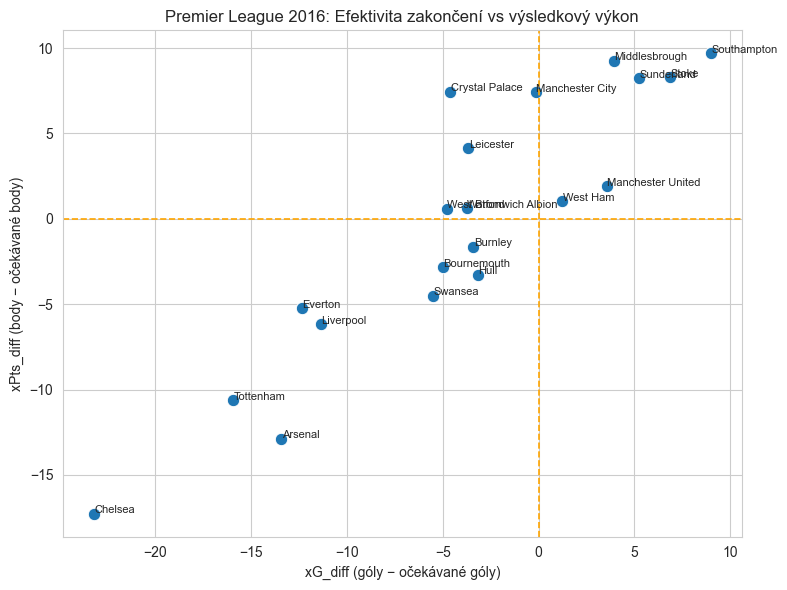

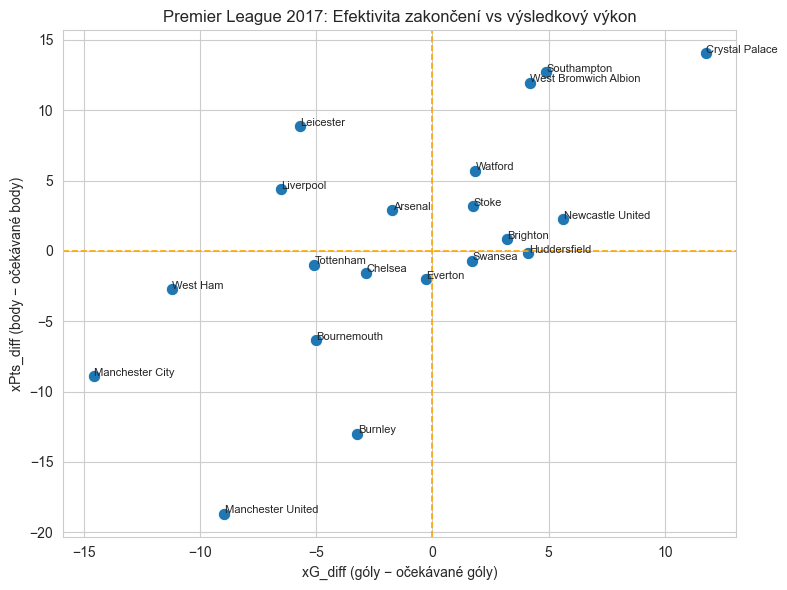

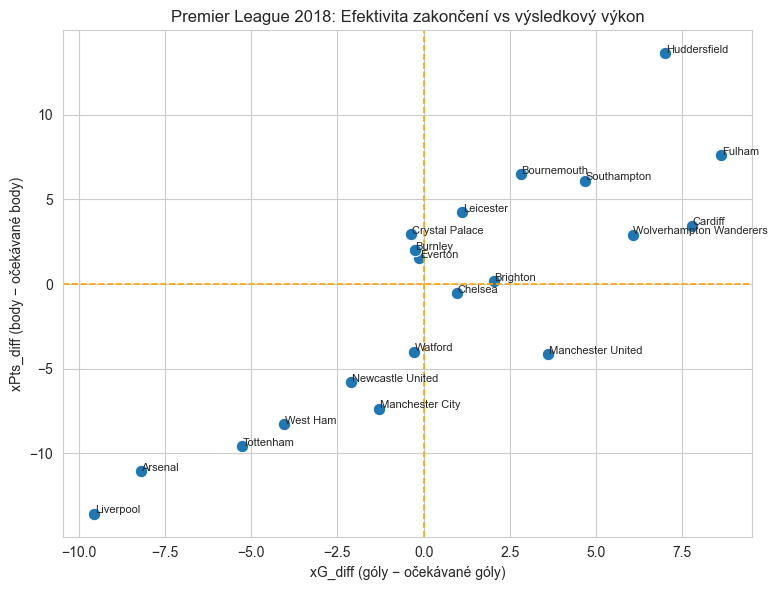

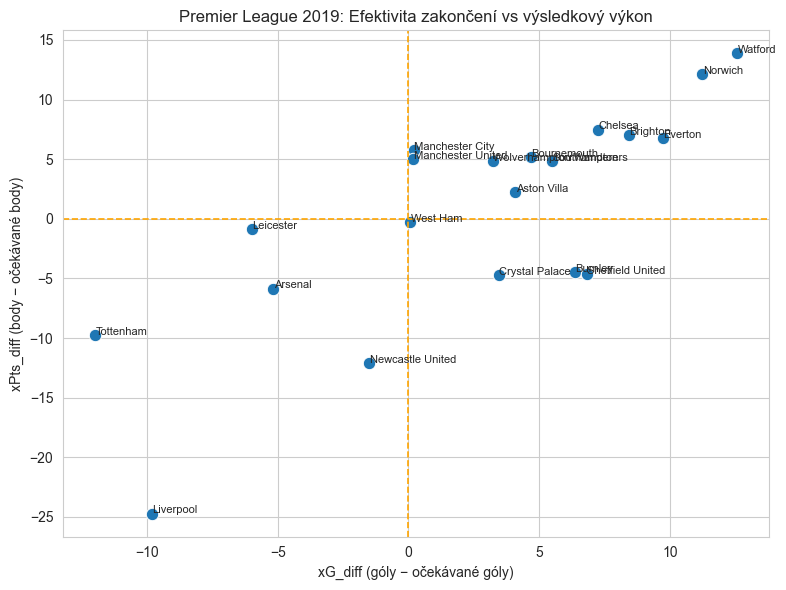

In [35]:
sns.set_style("whitegrid")

for year in seasons:
    data = epl[epl['season_year'] == year]

    plt.figure(figsize=(8,6))
    sns.scatterplot(data=data, x='xG_diff', y='xpts_diff', s=80, color='#1f77b4')

    # názvy týmů nad body
    for i in range(data.shape[0]):
        plt.text(
            data['xG_diff'].iloc[i] + 0.02,
            data['xpts_diff'].iloc[i] + 0.02,
            data['team'].iloc[i],
            fontsize=8
        )

    # osy y=x pro referenci nulového výkonu
    plt.axvline(0, color='orange', linestyle='--', linewidth=1.2)
    plt.axhline(0, color='orange', linestyle='--', linewidth=1.2)

    plt.title(f"Premier League {year}: Efektivita zakončení vs výsledkový výkon")
    plt.xlabel("xG_diff (góly − očekávané góly)")
    plt.ylabel("xPts_diff (body − očekávané body)")
    plt.tight_layout()
    plt.show()

- xG_diff > 0 → the team scores more goals than expected (effective offense)
- xPts_diff > 0 → the team earns more points than the xG model predicts (effective results)
- A positive correlation indicates that effective finishing also leads to better results
- Teams in the 4th quadrant (−xG_diff, +xPts_diff) may have a strong defense or be lucky

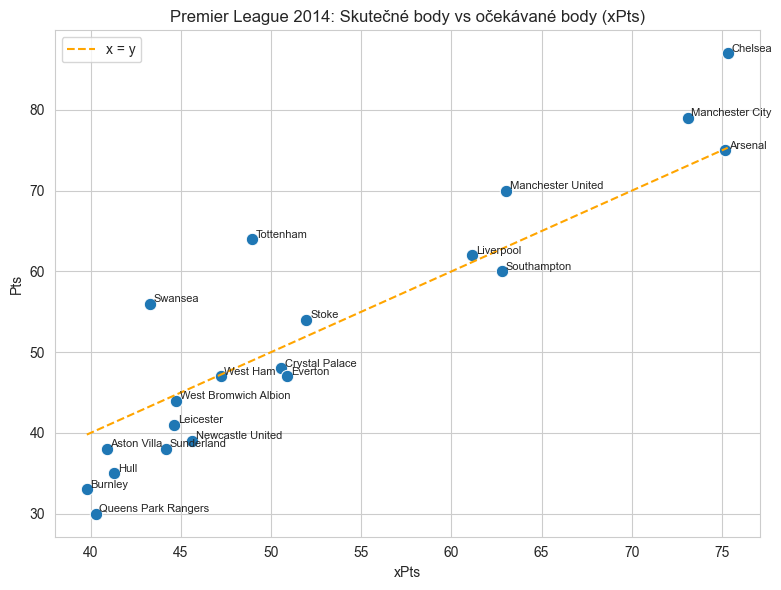

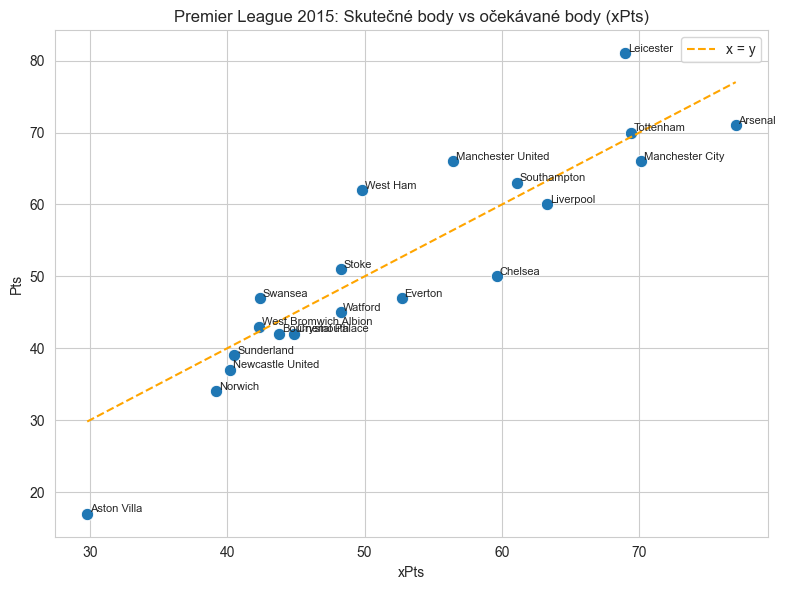

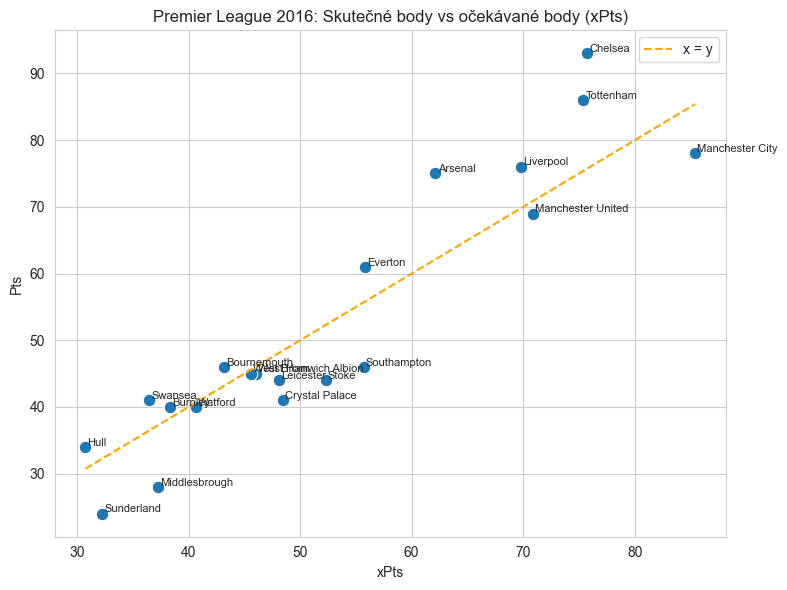

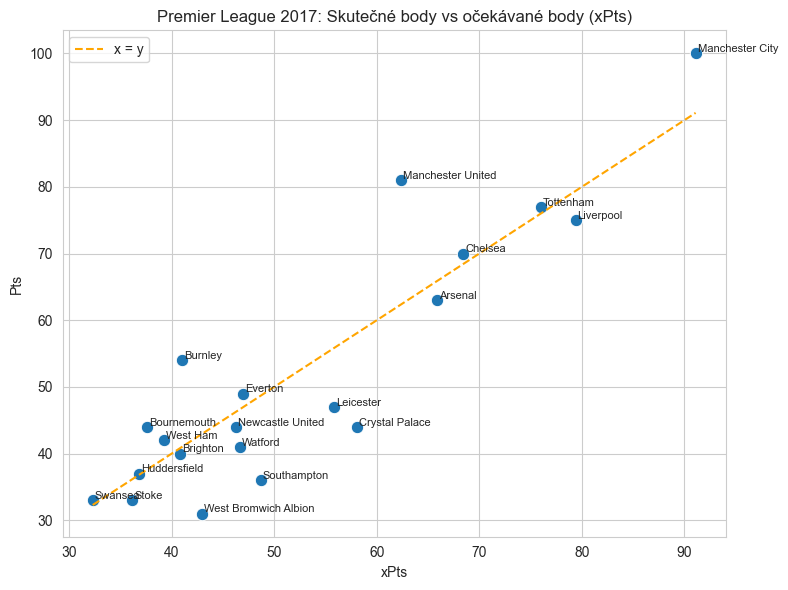

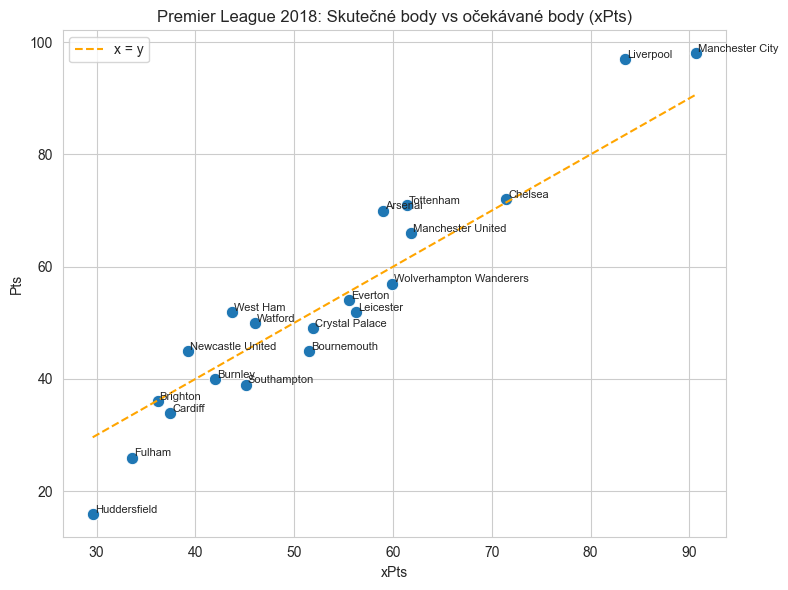

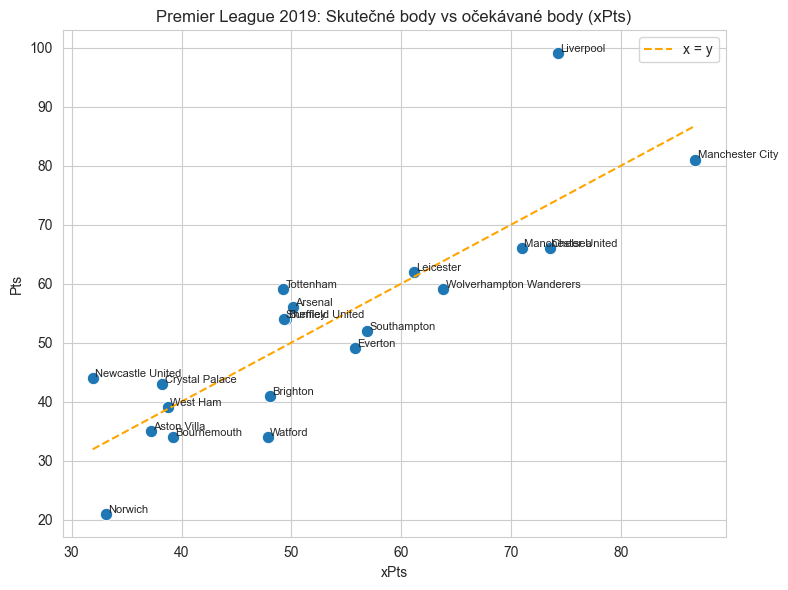

In [39]:
sns.set_style("whitegrid")

for year in seasons:
    data = epl[epl['season_year'] == year]

    plt.figure(figsize=(8,6))
    sns.scatterplot(data=data, x='xpts', y='pts', s=80, color='#1f77b4')

    # přidání názvů týmů
    for i in range(data.shape[0]):
        plt.text(
            data['xpts'].iloc[i] + 0.2,
            data['pts'].iloc[i] + 0.2,
            data['team'].iloc[i],
            fontsize=8
        )

    # referenční přímka y = x
    plt.plot(
        [data['xpts'].min(), data['xpts'].max()],
        [data['xpts'].min(), data['xpts'].max()],
        '--', color='orange', linewidth=1.5, label='x = y'
    )

    plt.title(f"Premier League {year}: Skutečné body vs očekávané body (xPts)")
    plt.xlabel("xPts")
    plt.ylabel("Pts")
    plt.legend()
    plt.tight_layout()
    plt.show()

- The graph shows the relationship between expected and actual points earned according to the xG model.
- Teams above the diagonal → overperformance (more points than predicted).
- Teams below the diagonal → underperformance (fewer points than predicted).
- It is interesting to observe fluctuations between seasons (e.g., Leicester 2015/16 with significant overperformance).

### Offensive dominance – Premier League (all seasons)

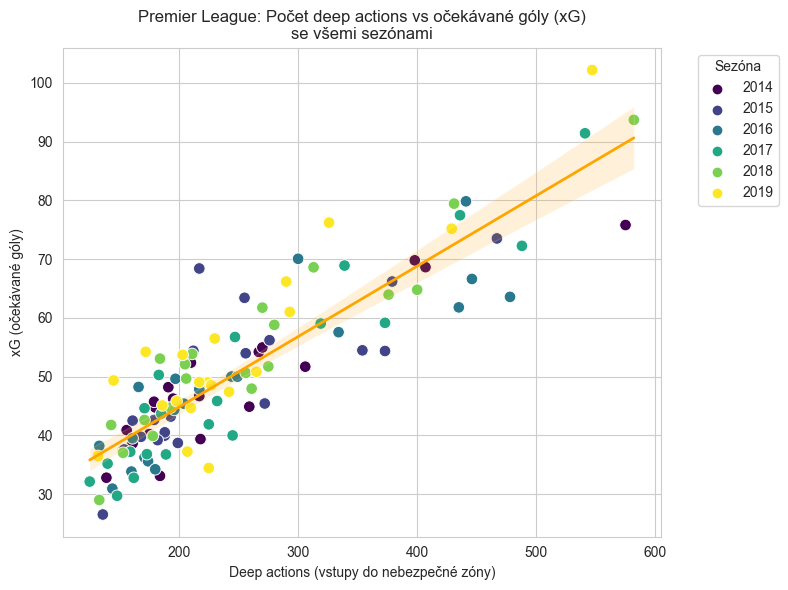

In [44]:
from scipy.stats import pearsonr
sns.set_style("whitegrid")

plt.figure(figsize=(8,6))

# scatterplot + regresní přímka (bez legendy, kvůli přehlednosti)
sns.scatterplot(data=epl, x='deep', y='xG', hue='season_year', palette='viridis', s=70)
sns.regplot(data=epl, x='deep', y='xG', scatter=False, color='orange', line_kws={'lw':2, 'label':'Regresní přímka'})


plt.title("Premier League: Počet deep actions vs očekávané góly (xG)\nse všemi sezónami")
plt.xlabel("Deep actions (vstupy do nebezpečné zóny)")
plt.ylabel("xG (očekávané góly)")
plt.legend(title='Sezóna', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- The graph shows the correlation between the number of deep actions and expected goals (xG) for all EPL seasons.
- The clearly visible positive relationship confirms that teams with more frequent entries into the danger zone create more scoring chances.

## Clustering

Variables were selected from the understat dataset that together capture the offensive, defensive, and tactical aspects of the game:
- **xG**: expected goals – offensive quality
- **xGA**: expected goals against – defensive stability
- **xG_diff**: difference between goals scored and expected goals – finishing efficiency
- **xpts_diff**: difference between actual and expected points – performance efficiency
- **ppda_coef**: pressing index (the lower the index, the more intense the pressing)
- **deep**: number of entries into the danger zone (offensive activity)

### PCA and Clustering

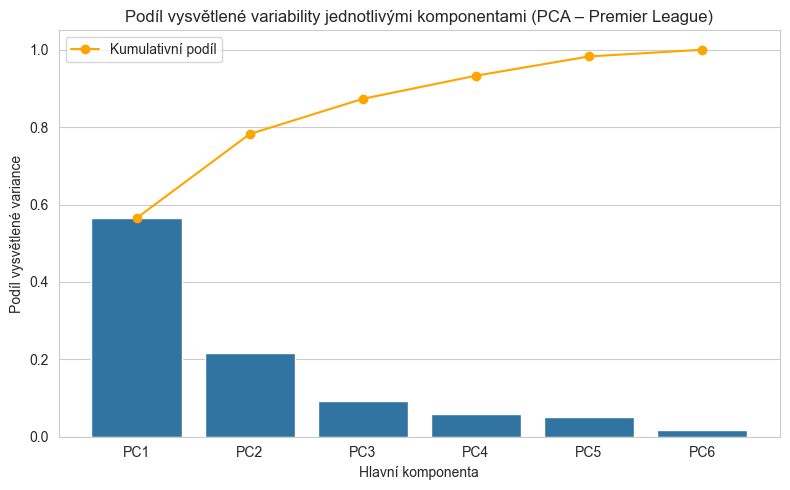

Dvě první komponenty vysvětlují přibližně 78.22% variability dat.


In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Premier League data
epl = df[df['league'] == 'EPL'][['xG', 'xGA', 'xG_diff', 'xpts_diff', 'ppda_coef', 'deep']].dropna()

# Scaler
X_scaled = StandardScaler().fit_transform(epl)

# PCA
pca = PCA(n_components=6)
pca_result = pca.fit_transform(X_scaled)

# Explained variability
explained = pca.explained_variance_ratio_

# Varplot
plt.figure(figsize=(8,5))
sns.barplot(x=[f"PC{i+1}" for i in range(len(explained))], y=explained, color='#1f77b4')
plt.plot(range(6), explained.cumsum(), marker='o', color='orange', label='Kumulativní podíl')
plt.title("Podíl vysvětlené variability jednotlivými komponentami (PCA – Premier League)")
plt.ylabel("Podíl vysvětlené variance")
plt.xlabel("Hlavní komponenta")
plt.legend()
plt.tight_layout()
plt.show()

# Cumsum Varplot
total_var = explained.cumsum()[1]
print(f"Dvě první komponenty vysvětlují přibližně {total_var:.2%} variability dat.")

C:\Users\cerve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


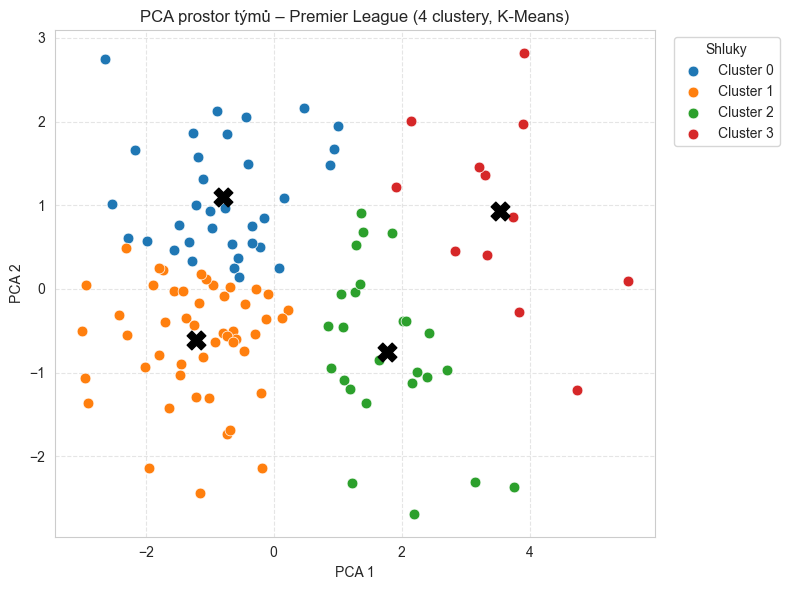

In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# EPL data a scaling
epl = df[df['league'] == 'EPL'][['xG','xGA','xG_diff','xpts_diff','ppda_coef','deep']].dropna()
X_scaled = StandardScaler().fit_transform(epl)

# PCA - 2D
pca_2d = PCA(n_components=2)
pca_coords = pca_2d.fit_transform(X_scaled)

# K-Means in PCA space
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(pca_coords)
centers = kmeans.cluster_centers_

epl = epl.copy()
epl['cluster_kmeans'] = clusters

plt.figure(figsize=(8,6))
cmap = plt.get_cmap('tab10')
for k in np.unique(clusters):
    sel = clusters == k
    plt.scatter(
        pca_coords[sel,0], pca_coords[sel,1],
        s=60, color=cmap(k), edgecolor='white', linewidth=0.5, label=f'Cluster {k}'
    )

# Centroids
plt.scatter(centers[:,0], centers[:,1], s=180, marker='X', color='black')

plt.title('PCA prostor týmů – Premier League (4 clustery, K-Means)')
plt.xlabel('PCA 1'); plt.ylabel('PCA 2')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Shluky', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()

Descriptive statistics for individual clusters

In [ ]:
summary_kmeans = (
    epl.groupby('cluster_kmeans')[['xG','xGA','xG_diff','xpts_diff','ppda_coef','deep']]
       .mean()
       .round(2)
)

cluster_sizes = epl['cluster_kmeans'].value_counts().sort_index()
summary_kmeans['Počet týmů'] = cluster_sizes.values
display(summary_kmeans)


,xG,xGA,xG_diff,xpts_diff,ppda_coef,deep,Počet týmů
cluster_kmeans,,,,,,,
0,41.79,57.74,-3.51,-3.72,13.34,190.38,34
1,44.34,55.05,3.89,5.67,12.74,193.31,49
2,65.12,39.68,-1.64,0.45,9.34,346.40,25
3,72.51,36.58,-10.65,-12.40,9.17,445.25,12


In [ ]:
summary_kmeans = (
    epl.groupby('cluster_kmeans')[['xG','xGA','xG_diff','xpts_diff','ppda_coef','deep']]
       .mean()
       .round(2)
)

cluster_sizes = epl['cluster_kmeans'].value_counts().sort_index()
summary_kmeans['Počet týmů'] = cluster_sizes.values
display(summary_kmeans)


,xG,xGA,xG_diff,xpts_diff,ppda_coef,deep,Počet týmů
cluster_kmeans,,,,,,,
0,41.79,57.74,-3.51,-3.72,13.34,190.38,34
1,44.34,55.05,3.89,5.67,12.74,193.31,49
2,65.12,39.68,-1.64,0.45,9.34,346.40,25
3,72.51,36.58,-10.65,-12.40,9.17,445.25,12


In [79]:
summary_kmeans = (
    epl.groupby('cluster_kmeans')[['xG','xGA','xG_diff','xpts_diff','ppda_coef','deep']]
       .mean()
       .round(2)
)

cluster_sizes = epl['cluster_kmeans'].value_counts().sort_index()
summary_kmeans['Počet týmů'] = cluster_sizes.values
display(summary_kmeans)


,xG,xGA,xG_diff,xpts_diff,ppda_coef,deep,Počet týmů
cluster_kmeans,,,,,,,
0,41.79,57.74,-3.51,-3.72,13.34,190.38,34
1,44.34,55.05,3.89,5.67,12.74,193.31,49
2,65.12,39.68,-1.64,0.45,9.34,346.40,25
3,72.51,36.58,-10.65,-12.40,9.17,445.25,12


### Dendrogram

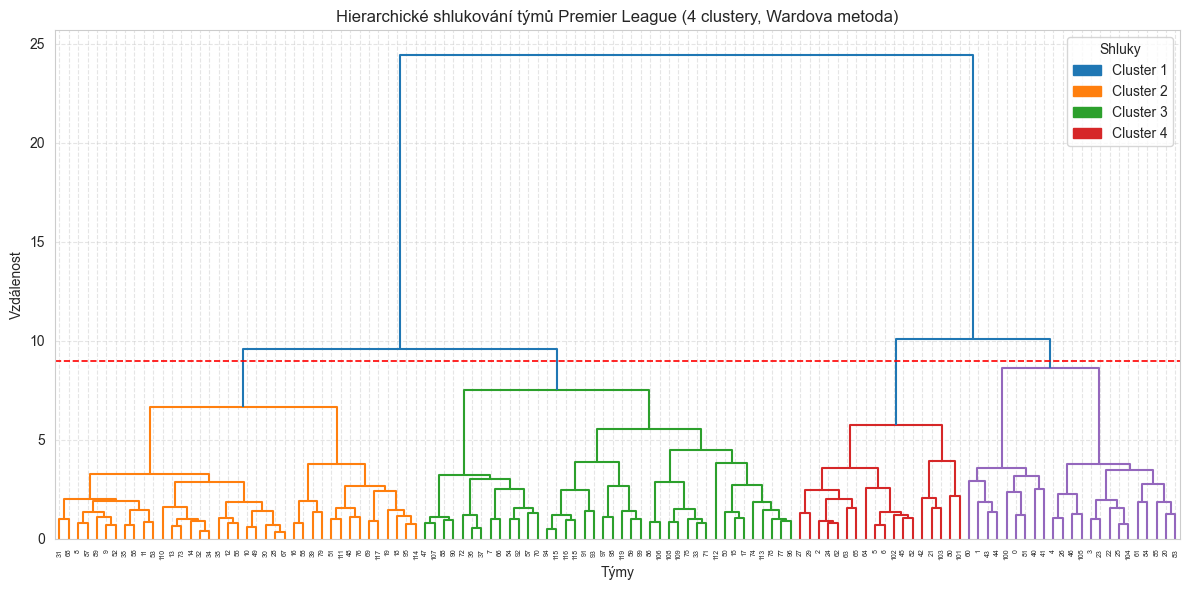

In [72]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.patches as mpatches

# definuj barevné mapování clusterů
cluster_colors = {
    1: "#1f77b4",  # modrá
    2: "#ff7f0e",  # oranžová
    3: "#2ca02c",  # zelená
    4: "#d62728"   # červená
}

# vizualizace dendrogramu
plt.figure(figsize=(12,6))
dendrogram(
    linked,
    truncate_mode='level',
    p=10,
    color_threshold=9,
)
plt.axhline(y=9, color='red', linestyle='--', linewidth=1.2, label='hranice 4 clusterů')

plt.title("Hierarchické shlukování týmů Premier League (4 clustery, Wardova metoda)")
plt.xlabel("Týmy")
plt.ylabel("Vzdálenost")
plt.grid(True, linestyle='--', alpha=0.5)

# vytvoř legendu pro clustery
legend_patches = [
    mpatches.Patch(color=color, label=f'Cluster {i}')
    for i, color in cluster_colors.items()
]
plt.legend(handles=legend_patches, title='Shluky', loc='upper right')

plt.tight_layout()
plt.show()

Identification of 4 clusters from the hierarchical model

In [73]:
from scipy.cluster.hierarchy import fcluster

# cutting dendrogram
labels = fcluster(linked, t=9.5, criterion='distance')
epl['cluster_hier'] = labels

Descriptive statistics for individual clusters

In [74]:
cluster_summary_hier = (
    epl.groupby('cluster_hier')
       [['xG', 'xGA', 'xG_diff', 'xpts_diff', 'ppda_coef', 'deep']]
       .mean()
       .round(2)
)
cluster_counts = epl['cluster_hier'].value_counts().sort_index()
cluster_summary_hier['Počet týmů'] = cluster_counts.values
cluster_summary_hier

,xG,xGA,xG_diff,xpts_diff,ppda_coef,deep,Počet týmů
cluster_hier,,,,,,,
1,44.44,53.18,2.03,5.07,11.38,196.90,39
2,41.37,59.35,0.82,-0.11,14.82,185.58,40
3,69.03,36.81,-0.86,2.76,9.43,393.28,18
4,63.52,42.65,-8.44,-9.97,9.35,337.70,23


Visualization of dendrogram with section highlighting

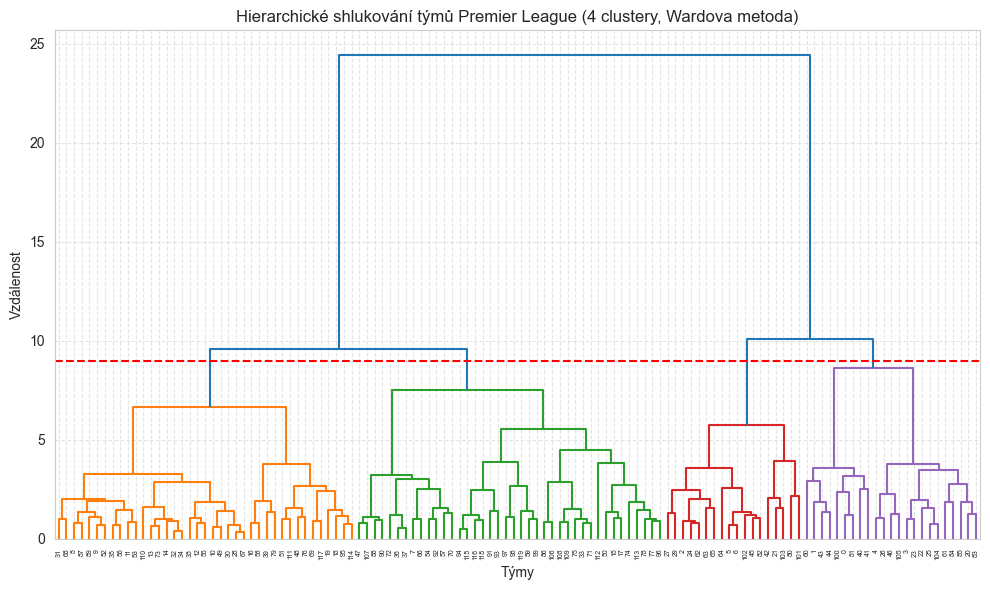

In [71]:
plt.figure(figsize=(10,6))
dendrogram(linked, truncate_mode='level', p=10, color_threshold=9)
plt.axhline(y=9, color='red', linestyle='--')
plt.title("Hierarchické shlukování týmů Premier League (4 clustery, Wardova metoda)")
plt.xlabel("Týmy")
plt.ylabel("Vzdálenost")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Spider-plot for Clusters

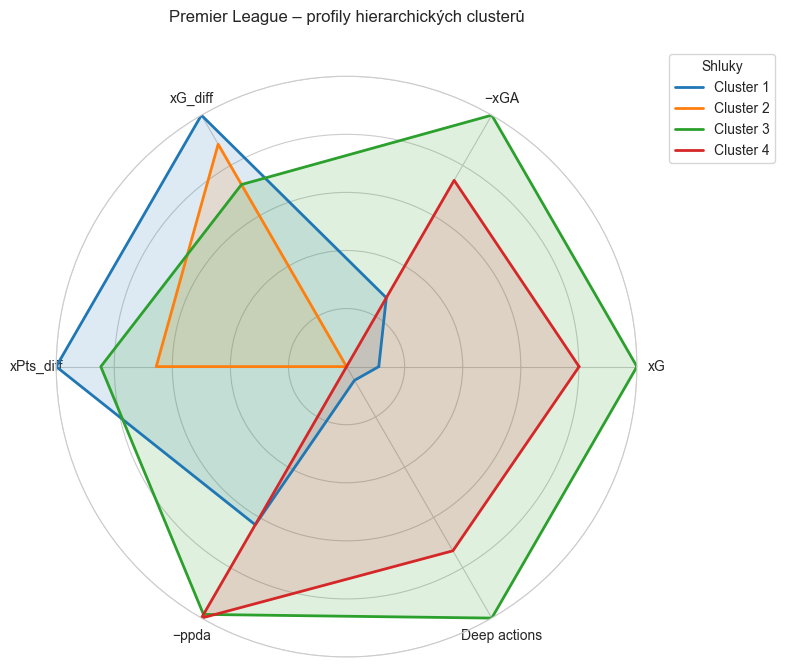

In [84]:
def plot_cluster_radar(summary_df, metrics=('xG','xGA','xG_diff','xpts_diff','ppda_coef','deep'),
                       title='Profil clusterů (radar)'):
    """
    summary_df: tabulka s průměry metrik po clusterech (index = cluster id),
                např. cluster_summary_hier nebo summary_kmeans
    metrics: které metriky promítnout do radaru (pořadí os)
    """
    # 1) připrav data (kopie)
    S = summary_df.loc[:, metrics].copy()

    # 2) sjednoť směr: všude 'vyšší = lepší'
    # - xGA (méně oček. gólů proti je lepší) → invertujeme
    # - ppda_coef (nižší = intenzivnější pressing) → invertujeme
    if 'xGA' in S.columns:
        S['xGA'] = -S['xGA']
    if 'ppda_coef' in S.columns:
        S['ppda_coef'] = -S['ppda_coef']

    # 3) min–max normalizace po sloupcích na [0,1]
    S_norm = (S - S.min()) / (S.max() - S.min() + 1e-9)

    # 4) nastavení radaru
    labels = list(S_norm.columns)
    n_vars = len(labels)
    angles = np.linspace(0, 2*np.pi, n_vars, endpoint=False).tolist()
    angles += angles[:1]  # uzavření polygonu

    # 5) vykreslení
    fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))
    cmap = plt.get_cmap('tab10')

    for i, (cluster_id, row) in enumerate(S_norm.iterrows()):
        values = row.values.tolist()
        values += values[:1]  # uzavření
        ax.plot(angles, values, linewidth=2, label=f'Cluster {cluster_id}', color=cmap(i))
        ax.fill(angles, values, alpha=0.15, color=cmap(i))

    # osy a popisky
    ax.set_xticks(angles[:-1])
    # hezčí názvy os (přidám šipku pro invertované metriky)
    pretty = []
    for m in labels:
        if m == 'xGA':
            pretty.append('−xGA')
        elif m == 'ppda_coef':
            pretty.append('−ppda')
        elif m == 'xG_diff':
            pretty.append('xG_diff')
        elif m == 'xpts_diff':
            pretty.append('xPts_diff')
        elif m == 'deep':
            pretty.append('Deep actions')
        else:
            pretty.append(m)
    ax.set_xticklabels(pretty)
    ax.set_yticklabels([])  # kružnice bez čísel
    ax.set_ylim(0, 1)

    ax.set_title(title, y=1.08)
    ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1.05), title='Shluky')
    plt.tight_layout()
    plt.show()

# --- Použití pro HIERARCHICKÉ clustery ---
plot_cluster_radar(cluster_summary_hier,
                   metrics=('xG','xGA','xG_diff','xpts_diff','ppda_coef','deep'),
                   title='Premier League – profily hierarchických clusterů')

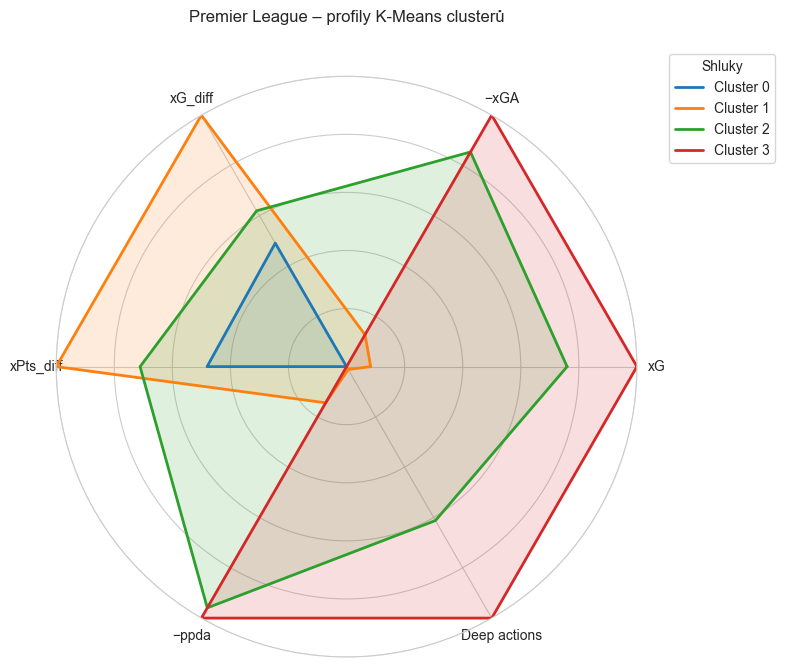

In [85]:
# --- použití pro K-MEANS clustery ---
plot_cluster_radar(summary_kmeans,
                   metrics=('xG','xGA','xG_diff','xpts_diff','ppda_coef','deep'),
                   title='Premier League – profily K-Means clusterů')